In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
vectors = pd.read_feather('data/1m.ftr')
corr = vectors.corr()
vectors.shape

(473641, 40)

### Plot Correlation Matrix 

In [3]:
def triangle_map(corrmat):
    fig, ax = plt.subplots(figsize=(12,12))
    df_lt = corrmat.where(np.tril(np.ones(corrmat.shape)).astype(np.bool))
    sns.heatmap(df_lt, cmap='binary', square=True)
    plt.show()

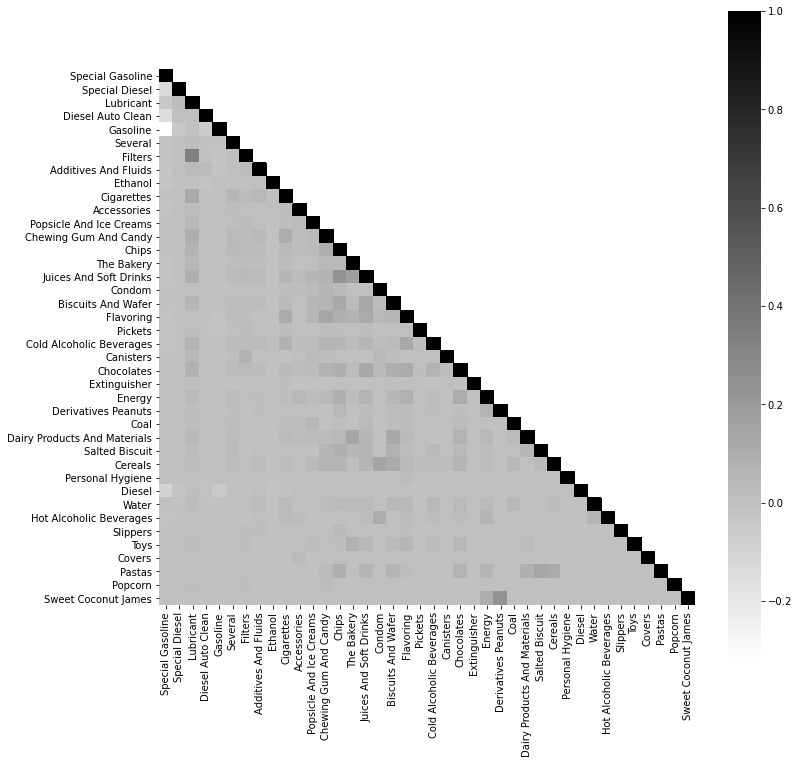

In [4]:
triangle_map(corr)

### Make Graph

In [5]:
# Distance function to transform matrix
def dfunc(cell):
        return np.sqrt(2 * (1 - cell))

In [43]:
# Generates a graph object from a binary purchase matrix
def make_graph(vec_df, limit=None, distance=False):
    # Generate correlation matrix
    corrmat = np.array(vec_df.corr())
    
    # Apply distance function if required
    if distance:
        corrmat = dfunc(corrmat)
    # Limit if required
    corrmat = corrmat[:limit, :limit] if limit else corrmat
    
    return nx.from_numpy_matrix(corrmat)

In [44]:
# Generates an encoded dictionary mapping each 
# node to an encoded value for each product
def make_labels(vec_df, limit=None):
    # Get columns and restrict if specified
    cols = vec_df.columns
    cols = cols[:limit] if limit else cols
    
    # Encode each label
    le = LabelEncoder()
    encoded = le.fit_transform(cols)
    
    # Generate a dict mapping each node to a label
    labels = {i:encoded[i] for i in range(len(cols))}
    
    # Make a legend for products and encodings
    legend = list(zip(encoded, vectors.columns))
    # Sort the legend for ease of use
    legend.sort()
    
    # Generate a dict mapping each node to a label
#     labels = {}
#     for i in range(len(cols)):
#         labels[i] = encoded[i]
    
    return labels, legend

In [45]:
# Function to plot a graph (takes in either a pandas dataframe or numpy matrix)
def draw(G, pos=None, labels=None, plotsize=(12,12), limit=None, linewidth=2, nodesize=400):
    
    # Position nodes using Fruchterman-Reingold force-directed algorithm.
    if pos is None:
        pos = nx.spring_layout(G)
    fig, ax = plt.subplots(figsize=plotsize)
    
    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_color='c', node_size=nodesize)
    
    # Draw the edges
    nx.draw_networkx_edges(G, pos, width=linewidth, edge_color='0.25')
    
    # Draw labels (if specified)
    if labels:
        nx.draw_networkx_labels(G, pos, labels, font_size=15)
        
    plt.show()

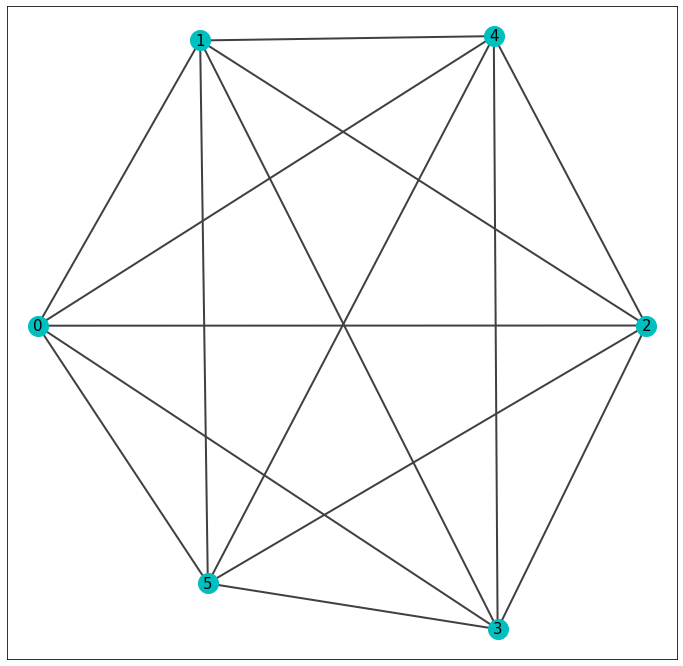

In [50]:
limit = 6
distance = True # set yes to use distance function


G = make_graph(vectors, limit=limit, distance=distance)
pos = nx.spring_layout(G)
labels, legend = make_labels(vectors, limit=limit)
graph = draw(G, pos=pos, labels=labels, limit=limit)

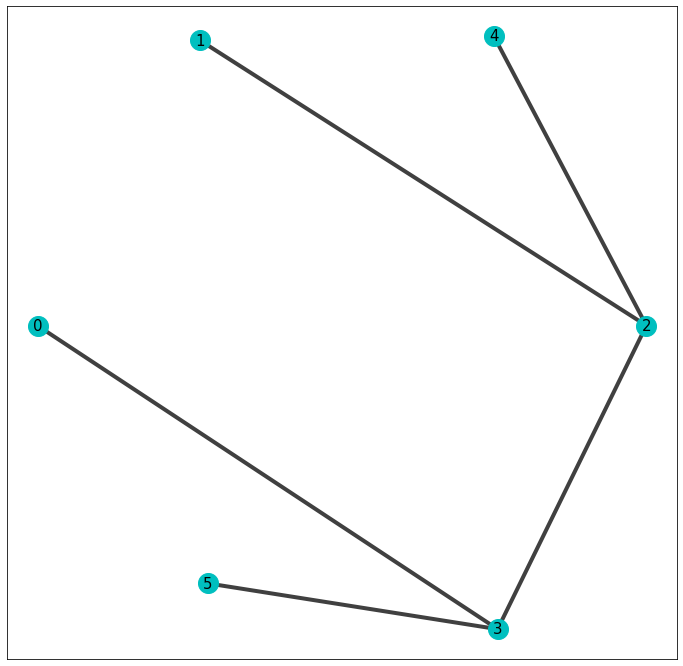

In [51]:
# Generate the MST for the graph
mst = nx.minimum_spanning_tree(G)
draw(mst, pos=pos, labels=labels, linewidth=4, nodesize=400)

In [52]:
E = [(a,b,c['weight']) for (a,b,c) in mst.edges(data=True)]
sorted(E, key=lambda x: x[2], reverse=True)

[(0, 5, 1.4205224303483457),
 (2, 4, 1.4155919064953635),
 (3, 5, 1.4116672969656974),
 (2, 5, 1.4039942559524081),
 (1, 2, 1.402813541558671)]